In [125]:
#import necessary libraries
import pandas as pd
import numpy as np

## Data Understanding and Preparation

In [126]:
#load companies data file
companies = pd.read_csv("companies.txt",encoding='ISO-8859-1',delimiter='\t')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [127]:
#checking info of companies data frame
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [128]:
#load round2 data file
round2 = pd.read_csv("rounds2.csv",encoding='ISO-8859-1')
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [129]:
#checking info of round2 data frame
round2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


#### How many unique companies are present in rounds2?

In [130]:
#convert the company permalink data into lower case for checking the unique companies in rounds2 
round2['company_permalink']=round2['company_permalink'].apply(lambda x:x.lower())
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [131]:
round2['company_permalink']=round2['company_permalink'].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))

In [132]:
#check unique companies
round2['company_permalink'].nunique()

66368

#### How many unique companies are present in the companies file?

In [133]:
#convert the data of permalink column into lower case for checking the unique companies in companies dataframe
companies['permalink']=companies['permalink'].apply(lambda x:x.lower())
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [134]:
companies['permalink'] = companies['permalink'].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))

In [135]:
#check unique companies
companies['permalink'].nunique()

66368

#### In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column

In [136]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In companies data frame there are total 66368 entries and only 2 columns have NON-NULL data i.e. (permalink and status) but status has repeated data with itself and permalink has 66368 unique entries in it so PERMALINK can be used as the unique key for each company

#### Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [137]:
#merging of two data frames
master_frame=pd.merge(companies,round2,how='inner',left_on='permalink',right_on='company_permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [138]:
#check the master_frame info
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


By checking info of master_frame there are total 114949 observations

In [139]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [140]:
#check the empty data in the form of percentage
round(100*(master_frame.isnull().sum())/len(master_frame.index))

permalink                   0.0
name                        0.0
homepage_url                5.0
category_list               3.0
status                      0.0
country_code                8.0
state_code                 10.0
region                      9.0
city                        9.0
founded_at                 18.0
company_permalink           0.0
funding_round_permalink     0.0
funding_round_type          0.0
funding_round_code         73.0
funded_at                   0.0
raised_amount_usd          17.0
dtype: float64

So, from above analysis it is clearly seen that the data in funding_round_code is containing 73% of empty data so we have to drop that column...and permalink and company_permalink provides same kind of information..so we have to drop one of them also

In [141]:
master_frame.drop(labels=['funding_round_code','company_permalink'],axis=1,inplace=True)

In [142]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 14 columns):
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(13)
memory usage: 13.2+ MB


In [143]:
#check the empty data in the form of percentage
round(100*(master_frame.isnull().sum())/len(master_frame.index))

permalink                   0.0
name                        0.0
homepage_url                5.0
category_list               3.0
status                      0.0
country_code                8.0
state_code                 10.0
region                      9.0
city                        9.0
founded_at                 18.0
funding_round_permalink     0.0
funding_round_type          0.0
funded_at                   0.0
raised_amount_usd          17.0
dtype: float64

### Funding Type Analysis

Spark Funds wants to choose one of these four investment types(venture, angel, seed, and private equity) for each potential investment they will make.

1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

As mentioned above we have to extract data where funding_round_type is venture, angel, seed, and private equity

In [144]:
funding_round_type_lst = ['seed','angel','venture','private_equity']
master_frame=master_frame[master_frame['funding_round_type'].isin(funding_round_type_lst)]
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [145]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94397 entries, 0 to 114947
Data columns (total 14 columns):
permalink                  94397 non-null object
name                       94396 non-null object
homepage_url               90252 non-null object
category_list              91900 non-null object
status                     94397 non-null object
country_code               87076 non-null object
state_code                 85118 non-null object
region                     85838 non-null object
city                       85841 non-null object
founded_at                 77678 non-null object
funding_round_permalink    94397 non-null object
funding_round_type         94397 non-null object
funded_at                  94397 non-null object
raised_amount_usd          80627 non-null float64
dtypes: float64(1), object(13)
memory usage: 10.8+ MB


In [146]:
#grouping of master_frame 
master_frame_by_funding=master_frame.groupby(by='funding_round_type')
master_frame_by_funding=master_frame_by_funding['raised_amount_usd'].mean().sort_values(ascending=False).apply(lambda x: '{:.1f}'.format(x))
master_frame_by_funding

funding_round_type
private_equity    73308593.0
venture           11748949.1
angel               958694.5
seed                719818.0
Name: raised_amount_usd, dtype: object

#### Average funding amount of venture type

In [147]:
float(master_frame_by_funding['venture'])

11748949.1

#### Average funding amount of angel type

In [148]:
float(master_frame_by_funding['angel'])

958694.5

#### Average funding amount of seed type

In [149]:
float(master_frame_by_funding['seed'])

719818.0

#### Average funding amount of private equity type

In [150]:
float(master_frame_by_funding['private_equity'])

73308593.0

#### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [151]:
funding_df = pd.DataFrame(master_frame_by_funding,dtype=np.float)
investment_type=funding_df[(funding_df['raised_amount_usd']>=5000000.0) & (funding_df['raised_amount_usd']<=15000000.0)]
investment_type.index

Index(['venture'], dtype='object', name='funding_round_type')

### Country Analysis

#### Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type

1. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.
2. Consider a country to be English speaking only if English is one of the official languages in that country

So First i am going to extract only those countries where official languages is english

fetch the list of english- speaking countries from the given link i.e.
https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

In [152]:
#fetching data from the 
html_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language')
type(html_data)

list

In [153]:
len(html_data)

19

In [154]:
#fetch 1st two data frames to get the official language of countries
table1=html_data[0]
table1.head()

,0,1,2,3,4,5
0,Nr,Country,Alpha-3 code,Region,Population,Primary language?
1,1,Australia,AUS,Oceania,25019600,Yes
2,2,New Zealand[1],NZL,Oceania,4893830,Yes
3,3,United Kingdom,GBR,Europe,66040229,Yes
4,4,United States,USA,North America/Oceania,325719178,Yes


In [155]:
table2 = html_data[1]
table2.head()

,0,1,2,3,4,5
0,Nr,Country,Alpha-3 code,Region,Population1,Primary language?
1,1,Antigua and Barbuda[2],ATG,Caribbean,85000,Yes
2,2,Bahamas[2],BHS,Caribbean,331000,Yes
3,3,Barbados[3],BRB,Caribbean,294000,Yes
4,4,Belize[4],BLZ,Central America,288000,Yes


In [156]:
countries_df = pd.merge(table1,table2,how='outer')
countries_df

,0,1,2,3,4,5
0,Nr,Country,Alpha-3 code,Region,Population,Primary language?
1,1,Australia,AUS,Oceania,25019600,Yes
2,2,New Zealand[1],NZL,Oceania,4893830,Yes
3,3,United Kingdom,GBR,Europe,66040229,Yes
4,4,United States,USA,North America/Oceania,325719178,Yes
5,Nr,Country,Alpha-3 code,Region,Population1,Primary language?
6,1,Antigua and Barbuda[2],ATG,Caribbean,85000,Yes
7,2,Bahamas[2],BHS,Caribbean,331000,Yes
8,3,Barbados[3],BRB,Caribbean,294000,Yes
9,4,Belize[4],BLZ,Central America,288000,Yes


In [157]:
#drop unnecessary columns
countries_df.drop(labels=[0,1,3,4],axis=1,inplace=True)

In [158]:
#rename the column name
countries_df.rename(columns={2:'country_code',5:'primary_language'},inplace=True)
countries_df.head()

,country_code,primary_language
0,Alpha-3 code,Primary language?
1,AUS,Yes
2,NZL,Yes
3,GBR,Yes
4,USA,Yes


In [159]:
#split the data on behalf of space to get the right data
countries_df['primary_language']= countries_df['primary_language'].apply(lambda x:x.split()[0])
countries_df

,country_code,primary_language
0,Alpha-3 code,Primary
1,AUS,Yes
2,NZL,Yes
3,GBR,Yes
4,USA,Yes
5,Alpha-3 code,Primary
6,ATG,Yes
7,BHS,Yes
8,BRB,Yes
9,BLZ,Yes


In [160]:
#extract all the countries where official language is 'ENGLISH'
countries_df=countries_df[(countries_df['primary_language']=='Yes') | (countries_df['primary_language']=='No')]
len(countries_df)

61

There are total 61 countries where official language is ENGLISH

In [161]:
countries_df.head()

,country_code,primary_language
1,AUS,Yes
2,NZL,Yes
3,GBR,Yes
4,USA,Yes
6,ATG,Yes


#### Extract the data from the master_frame across ALL sectors for the chosen investment type i.e. VENTURE

In [162]:
master_frame_ft=master_frame.loc[master_frame['funding_round_type'].isin(investment_type.index)]
master_frame_ft.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN


In [163]:
#checking master_frame info after extracting the chosen investment type (VENTURE)
master_frame_ft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 114946
Data columns (total 14 columns):
permalink                  55494 non-null object
name                       55494 non-null object
homepage_url               52549 non-null object
category_list              54362 non-null object
status                     55494 non-null object
country_code               52619 non-null object
state_code                 51698 non-null object
region                     51940 non-null object
city                       51940 non-null object
founded_at                 44303 non-null object
funding_round_permalink    55494 non-null object
funding_round_type         55494 non-null object
funded_at                  55494 non-null object
raised_amount_usd          50228 non-null float64
dtypes: float64(1), object(13)
memory usage: 6.4+ MB


In [164]:
#merge both datasets i.e. master_frame and countries_df to get countries whose official language is ENGLISH
master_frame_ft=pd.merge(master_frame_ft,countries_df,left_on='country_code',right_on='country_code')
master_frame_ft

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_language
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,No
1,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,22-07-2013,NaN,No
2,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,No
3,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.0,No
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,No
5,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.0,No
6,/organization/99games-online-private-limited,99Games Online Private Limited,http://www.99games.in,Games,operating,IND,19,Udupi,Udupi,01-01-2008,/funding-round/87ada2328b16d0e9f5122e7dff49cf0c,venture,17-04-2015,NaN,No
7,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,No
8,/organization/abhinav-outsourcings-pvt-ltd,Abhinav Outsourcings Pvt. Ltd,http://www.abhinav.com/,Business Services|Outsourcing,operating,IND,7,New Delhi,New Delhi,02-10-1994,/funding-round/e53264a913cb88b0bbffa912d0c0bfc6,venture,10-03-2015,NaN,No
9,/organization/acb-india-limited,ACB (India) Limited,http://www.aryancoal.com,Energy|Mining Technologies,operating,IND,10,New Delhi,Gurgaon,01-01-1997,/funding-round/e8be4d4069d490218db8008f4aefa0f0,venture,31-03-2008,25090000.0,No


#### Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [165]:
master_frame_by_country = master_frame_ft.groupby(by='country_code')
total_funding = master_frame_by_country['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x: '{:.1f}'.format(x)).head(9)
total_funding

country_code
USA    422510842796.0
GBR     20245627416.0
IND     14391858718.0
CAN      9583332317.0
SGP      2793917856.0
IRL      1676131350.0
AUS      1322934948.0
NZL       448316383.0
NGA       245440000.0
Name: raised_amount_usd, dtype: object

#### For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [166]:
top9=pd.DataFrame(data=total_funding)
top9

,raised_amount_usd
country_code,
USA,422510842796.0
GBR,20245627416.0
IND,14391858718.0
CAN,9583332317.0
SGP,2793917856.0
IRL,1676131350.0
AUS,1322934948.0
NZL,448316383.0
NGA,245440000.0


#### top three English-speaking countries in the data frame top9.

In [167]:
top9.head(3)

,raised_amount_usd
country_code,
USA,422510842796.0
GBR,20245627416.0
IND,14391858718.0


### Sector Analysis 1

Now we also know the three most investment-friendly countries and the most suited funding type for Spark Funds. Let us now focus on finding the best sectors in these countries.

In [168]:
#Extract top 3 countries from the master frame to find the best sectors in these countries
master_frame_ft=master_frame_ft.loc[master_frame_ft['country_code'].isin(top9.index[:3])]
master_frame_ft

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_language
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,No
1,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,22-07-2013,NaN,No
2,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,No
3,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.0,No
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,No
5,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.0,No
6,/organization/99games-online-private-limited,99Games Online Private Limited,http://www.99games.in,Games,operating,IND,19,Udupi,Udupi,01-01-2008,/funding-round/87ada2328b16d0e9f5122e7dff49cf0c,venture,17-04-2015,NaN,No
7,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,No
8,/organization/abhinav-outsourcings-pvt-ltd,Abhinav Outsourcings Pvt. Ltd,http://www.abhinav.com/,Business Services|Outsourcing,operating,IND,7,New Delhi,New Delhi,02-10-1994,/funding-round/e53264a913cb88b0bbffa912d0c0bfc6,venture,10-03-2015,NaN,No
9,/organization/acb-india-limited,ACB (India) Limited,http://www.aryancoal.com,Energy|Mining Technologies,operating,IND,10,New Delhi,Gurgaon,01-01-1997,/funding-round/e8be4d4069d490218db8008f4aefa0f0,venture,31-03-2008,25090000.0,No


In [169]:
#check the empty data in the form of percentage
round(100*(master_frame_ft.isnull().sum())/len(master_frame_ft.index))

permalink                   0.0
name                        0.0
homepage_url                5.0
category_list               1.0
status                      0.0
country_code                0.0
state_code                  0.0
region                      0.0
city                        0.0
founded_at                 17.0
funding_round_permalink     0.0
funding_round_type          0.0
funded_at                   0.0
raised_amount_usd           6.0
primary_language            0.0
dtype: float64

When we say sector analysis, we refer to one of the eight main sectors...so we have to drop that rows which provide NULL values to category_list..because NULL values do not refer to any sector

In [170]:
master_frame_ft=master_frame_ft[master_frame_ft['category_list'].notnull()]
master_frame_ft

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_language
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,No
1,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,22-07-2013,NaN,No
2,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,No
3,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.0,No
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,No
5,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.0,No
6,/organization/99games-online-private-limited,99Games Online Private Limited,http://www.99games.in,Games,operating,IND,19,Udupi,Udupi,01-01-2008,/funding-round/87ada2328b16d0e9f5122e7dff49cf0c,venture,17-04-2015,NaN,No
7,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,No
8,/organization/abhinav-outsourcings-pvt-ltd,Abhinav Outsourcings Pvt. Ltd,http://www.abhinav.com/,Business Services|Outsourcing,operating,IND,7,New Delhi,New Delhi,02-10-1994,/funding-round/e53264a913cb88b0bbffa912d0c0bfc6,venture,10-03-2015,NaN,No
9,/organization/acb-india-limited,ACB (India) Limited,http://www.aryancoal.com,Energy|Mining Technologies,operating,IND,10,New Delhi,Gurgaon,01-01-1997,/funding-round/e8be4d4069d490218db8008f4aefa0f0,venture,31-03-2008,25090000.0,No


In [171]:
#check the empty data in the form of percentage
round(100*(master_frame_ft.isnull().sum())/len(master_frame_ft.index))

permalink                   0.0
name                        0.0
homepage_url                5.0
category_list               0.0
status                      0.0
country_code                0.0
state_code                  0.0
region                      0.0
city                        0.0
founded_at                 16.0
funding_round_permalink     0.0
funding_round_type          0.0
funded_at                   0.0
raised_amount_usd           6.0
primary_language            0.0
dtype: float64

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector.

In [172]:
#Extract the primary sector of each category list from the category_list column
master_frame_ft['category_list']=master_frame_ft['category_list'].apply(lambda x:x.split('|')[0])
master_frame_ft.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_language
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,No
1,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,22-07-2013,NaN,No
2,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,No
3,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech,operating,IND,19,Bangalore,Bangalore,01-01-2001,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.0,No
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D,operating,IND,19,Bangalore,Bangalore,01-06-2006,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.0,No


In [173]:
#reading mapping dataset
mapping=pd.read_csv("mapping.csv")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors

In [174]:
#using melt function to reshape the data so that each category_list is mapped to its main sector
mapping_melt_frame=pd.melt(mapping,id_vars=['category_list'],var_name='main_sector')
mapping_melt_frame=mapping_melt_frame[mapping_melt_frame['value']==1]
mapping_melt_frame

,category_list,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


#### Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

In [175]:
merged_frame_ft=pd.merge(master_frame_ft,mapping_melt_frame,left_on='category_list',right_on='category_list')
merged_frame_ft

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_language,main_sector,value
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,No,Entertainment,1
1,/organization/manas-informatics,Manas Informatic,http://www.topnews.in,Media,operating,IND,23,Mohali,Mohali,05-05-2007,/funding-round/719e50301803d3918ffa558fc877e41c,venture,02-02-2008,160000.0,No,Entertainment,1
2,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Yes,Entertainment,1
3,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.0,Yes,Entertainment,1
4,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.0,Yes,Entertainment,1
5,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.0,Yes,Entertainment,1
6,/organization/babble,Babble,http://www.babble.com,Media,acquired,USA,NY,New York City,New York,01-12-2006,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.0,Yes,Entertainment,1
7,/organization/babble,Babble,http://www.babble.com,Media,acquired,USA,NY,New York City,New York,01-12-2006,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12-05-2009,1250000.0,Yes,Entertainment,1
8,/organization/babble,Babble,http://www.babble.com,Media,acquired,USA,NY,New York City,New York,01-12-2006,/funding-round/9948a4b334b8988c2a5e00bc8b4be3ec,venture,21-05-2010,3000000.0,Yes,Entertainment,1
9,/organization/bedloo,Bedloo,http://bedloo.com,Media,operating,USA,CA,Los Angeles,Thousand Oaks,01-10-2011,/funding-round/50155d27414ab5e0c24aa827281499f3,venture,15-09-2012,657589.0,Yes,Entertainment,1


In [176]:
#drop unnecessary columns
merged_frame_ft.drop(labels=['value','primary_language'],axis=1,inplace=True)
merged_frame_ft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38431 entries, 0 to 38430
Data columns (total 15 columns):
permalink                  38431 non-null object
name                       38431 non-null object
homepage_url               36622 non-null object
category_list              38431 non-null object
status                     38431 non-null object
country_code               38431 non-null object
state_code                 38353 non-null object
region                     38262 non-null object
city                       38262 non-null object
founded_at                 32085 non-null object
funding_round_permalink    38431 non-null object
funding_round_type         38431 non-null object
funded_at                  38431 non-null object
raised_amount_usd          36187 non-null float64
main_sector                38431 non-null object
dtypes: float64(1), object(14)
memory usage: 4.7+ MB


In [177]:
#To check unique main sector in the data frame
merged_frame_ft['main_sector'].nunique()

8

In [178]:
merged_frame_ft.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment
1,/organization/manas-informatics,Manas Informatic,http://www.topnews.in,Media,operating,IND,23,Mohali,Mohali,05-05-2007,/funding-round/719e50301803d3918ffa558fc877e41c,venture,02-02-2008,160000.0,Entertainment
2,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Entertainment
3,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.0,Entertainment
4,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.0,Entertainment


###  Sector Analysis 2

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range

In [179]:
d1=pd.DataFrame(merged_frame_ft[(merged_frame_ft['raised_amount_usd']>=5000000.0) & (merged_frame_ft['raised_amount_usd']<=15000000.0) & (merged_frame_ft['country_code']==top9.index[0])])
d2=pd.DataFrame(merged_frame_ft[(merged_frame_ft['raised_amount_usd']>=5000000.0) & (merged_frame_ft['raised_amount_usd']<=15000000.0) & (merged_frame_ft['country_code']==top9.index[1])])
d3=pd.DataFrame(merged_frame_ft[(merged_frame_ft['raised_amount_usd']>=5000000.0) & (merged_frame_ft['raised_amount_usd']<=15000000.0) & (merged_frame_ft['country_code']==top9.index[2])])

In [180]:
d1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
2,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Entertainment
12,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,Entertainment
18,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,Entertainment
19,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,Entertainment
22,/organization/matchmine,MatchMine,http://matchmine.com,Media,closed,USA,MA,Boston,Needham,01-01-2007,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,Entertainment


In [181]:
d2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
41,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Entertainment
42,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Entertainment
118,/organization/wahanda,Wahanda,http://www.wahanda.com,Beauty,acquired,GBR,H9,London,London,14-02-2008,/funding-round/bdc096f86838a758de358c8ce509067d,venture,17-10-2011,8682611.0,Health
1157,/organization/acs-clothing,ACS Clothing,http://hirewear.co.uk,E-Commerce,operating,GBR,V2,Glasgow,Glasgow,01-01-1997,/funding-round/064999587157b0ceae7843204a105d6d,venture,28-09-2015,13359377.0,Others
1158,/organization/acs-clothing,ACS Clothing,http://hirewear.co.uk,E-Commerce,operating,GBR,V2,Glasgow,Glasgow,01-01-1997,/funding-round/875b4295af2381558cec9d97f86fe3e4,venture,02-03-2014,12879637.0,Others


In [182]:
d3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment
120,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,Others
125,/organization/bestylish-com,beStylish.com,http://www.bestylish.com,E-Commerce,closed,IND,10,New Delhi,Gurgaon,10-05-2011,/funding-round/8f9ccb7142b83f0d41c9d83a18612fbe,venture,01-06-2012,10000000.0,Others
133,/organization/caratlane,CaratLane,http://www.caratlane.com,E-Commerce,operating,IND,25,Chennai,Chennai,01-10-2008,/funding-round/df866e22da2bfc6cfc797385ea5fb071,venture,22-06-2011,6000000.0,Others
134,/organization/caratlane,CaratLane,http://www.caratlane.com,E-Commerce,operating,IND,25,Chennai,Chennai,01-10-2008,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,venture,13-05-2013,15000000.0,Others


In [183]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11149 entries, 2 to 38416
Data columns (total 15 columns):
permalink                  11149 non-null object
name                       11149 non-null object
homepage_url               10605 non-null object
category_list              11149 non-null object
status                     11149 non-null object
country_code               11149 non-null object
state_code                 11147 non-null object
region                     11140 non-null object
city                       11140 non-null object
founded_at                 9561 non-null object
funding_round_permalink    11149 non-null object
funding_round_type         11149 non-null object
funded_at                  11149 non-null object
raised_amount_usd          11149 non-null float64
main_sector                11149 non-null object
dtypes: float64(1), object(14)
memory usage: 1.4+ MB


In [184]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 41 to 38430
Data columns (total 15 columns):
permalink                  577 non-null object
name                       577 non-null object
homepage_url               550 non-null object
category_list              577 non-null object
status                     577 non-null object
country_code               577 non-null object
state_code                 563 non-null object
region                     548 non-null object
city                       548 non-null object
founded_at                 459 non-null object
funding_round_permalink    577 non-null object
funding_round_type         577 non-null object
funded_at                  577 non-null object
raised_amount_usd          577 non-null float64
main_sector                577 non-null object
dtypes: float64(1), object(14)
memory usage: 72.1+ KB


In [185]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 33980
Data columns (total 15 columns):
permalink                  299 non-null object
name                       299 non-null object
homepage_url               297 non-null object
category_list              299 non-null object
status                     299 non-null object
country_code               299 non-null object
state_code                 298 non-null object
region                     298 non-null object
city                       298 non-null object
founded_at                 257 non-null object
funding_round_permalink    299 non-null object
funding_round_type         299 non-null object
funded_at                  299 non-null object
raised_amount_usd          299 non-null float64
main_sector                299 non-null object
dtypes: float64(1), object(14)
memory usage: 37.4+ KB


In [186]:
#The total number (or count) of investments for each main sector for USA
d1_group = d1.groupby(by='main_sector',as_index=False)
d1_count = pd.DataFrame(d1_group['raised_amount_usd'].count())
d1_count.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d1_count

,main_sector,count_of_investment
0,Automotive & Sports,167
1,Cleantech / Semiconductors,2297
2,Entertainment,580
3,Health,908
4,Manufacturing,799
5,"News, Search and Messaging",1563
6,Others,2923
7,"Social, Finance, Analytics, Advertising",1912


In [187]:
#The total number (or count) of investments for each main sector in a separate column

#merge d1 data frame with d1_count data frame
d1=pd.merge(d1,d1_count,left_on='main_sector',right_on='main_sector')
d1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Entertainment,580
1,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,Entertainment,580
2,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,Entertainment,580
3,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,Entertainment,580
4,/organization/matchmine,MatchMine,http://matchmine.com,Media,closed,USA,MA,Boston,Needham,01-01-2007,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,Entertainment,580


In [188]:
#The total amount invested in each main sector for USA
d1_group = d1.groupby(by='main_sector',as_index=False)
d1_sum = pd.DataFrame(d1_group['raised_amount_usd'].sum())
d1_sum.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d1_sum['total_amount_of_investment']=d1_sum['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d1_sum

,main_sector,total_amount_of_investment
0,Automotive & Sports,1454104361.0
1,Cleantech / Semiconductors,21181003033.0
2,Entertainment,5000212982.0
3,Health,8200859357.0
4,Manufacturing,7258553378.0
5,"News, Search and Messaging",13796816094.0
6,Others,26089280296.0
7,"Social, Finance, Analytics, Advertising",16680695048.0


In [189]:
#The total amount invested in each main sector in a separate column

#merge both frames 
d1=pd.merge(d1,d1_sum,left_on='main_sector',right_on='main_sector')
d1

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment,total_amount_of_investment
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Entertainment,580,5000212982.0
1,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,Entertainment,580,5000212982.0
2,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,Entertainment,580,5000212982.0
3,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,Entertainment,580,5000212982.0
4,/organization/matchmine,MatchMine,http://matchmine.com,Media,closed,USA,MA,Boston,Needham,01-01-2007,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,Entertainment,580,5000212982.0
5,/organization/mediabong,MEDIABONG,http://www.mediabong.com,Media,operating,USA,NY,New York City,New York,30-05-2011,/funding-round/9282890ca87072025dc1807f400acee6,venture,13-05-2015,5000000.0,Entertainment,580,5000212982.0
6,/organization/newscorporation,News Corp,http://www.newscorp.com,Media,ipo,USA,NY,New York City,New York,01-01-2013,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,08-01-2010,12500000.0,Entertainment,580,5000212982.0
7,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,08-08-2008,9400000.0,Entertainment,580,5000212982.0
8,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,25-06-2009,6500000.0,Entertainment,580,5000212982.0
9,/organization/plumtv,PlumTV,http://www.plumtv.com,Media,closed,USA,NY,New York City,New York,01-01-2002,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,01-09-2009,5200000.0,Entertainment,580,5000212982.0


In [190]:
#The total number (or count) of investments for each main sector for GBR
d2_group = d2.groupby(by='main_sector',as_index=False)
d2_count = pd.DataFrame(d2_group['raised_amount_usd'].count())
d2_count.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d2_count

,main_sector,count_of_investment
0,Automotive & Sports,16
1,Cleantech / Semiconductors,127
2,Entertainment,54
3,Health,24
4,Manufacturing,42
5,"News, Search and Messaging",73
6,Others,143
7,"Social, Finance, Analytics, Advertising",98


In [191]:
d2=pd.merge(d2,d2_count,left_on='main_sector',right_on='main_sector')
d2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment
0,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Entertainment,54
1,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Entertainment,54
2,/organization/eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,13-05-2010,8800000.0,Entertainment,54
3,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,01-06-2011,10000000.0,Entertainment,54
4,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,23-11-2006,10860000.0,Entertainment,54


In [192]:
#The total amount invested in each main sector for G.B.R.
d2_group = d2.groupby(by='main_sector',as_index=False)
d2_sum = pd.DataFrame(d2_group['raised_amount_usd'].sum())
d2_sum.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d2_sum['total_amount_of_investment']=d2_sum['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d2_sum

,main_sector,total_amount_of_investment
0,Automotive & Sports,167051565.0
1,Cleantech / Semiconductors,1136905008.0
2,Entertainment,461511059.0
3,Health,214537510.0
4,Manufacturing,361940335.0
5,"News, Search and Messaging",615746235.0
6,Others,1249124289.0
7,"Social, Finance, Analytics, Advertising",821888357.0


In [193]:
d2=pd.merge(d2,d2_sum,left_on='main_sector',right_on='main_sector')
d2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment,total_amount_of_investment
0,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Entertainment,54,461511059.0
1,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Entertainment,54,461511059.0
2,/organization/eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,13-05-2010,8800000.0,Entertainment,54,461511059.0
3,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,01-06-2011,10000000.0,Entertainment,54,461511059.0
4,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,23-11-2006,10860000.0,Entertainment,54,461511059.0


In [194]:
#The total number (or count) of investments for each main sector for IND.
d3_group = d3.groupby(by='main_sector',as_index=False)
d3_count = pd.DataFrame(d3_group['raised_amount_usd'].count())
d3_count.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d3_count

,main_sector,count_of_investment
0,Automotive & Sports,13
1,Cleantech / Semiconductors,20
2,Entertainment,33
3,Health,19
4,Manufacturing,21
5,"News, Search and Messaging",52
6,Others,109
7,"Social, Finance, Analytics, Advertising",32


In [195]:
d3=pd.merge(d3,d3_count,left_on='main_sector',right_on='main_sector')
d3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment,33
1,/organization/dhruva,Dhruva,http://www.dhruva.com/,Games,operating,IND,19,Bangalore,Bangalore,01-01-1997,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,27-11-2006,5000000.0,Entertainment,33
2,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,29-03-2007,5000000.0,Entertainment,33
3,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,30-03-2011,6000000.0,Entertainment,33
4,/organization/pokkt,POKKT,http://www.pokkt.com,Games,operating,IND,16,Mumbai,Mumbai,01-08-2012,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,03-11-2015,5000000.0,Entertainment,33


In [196]:
#The total amount invested in each main sector for IND
d3_group = d3.groupby(by='main_sector',as_index=False)
d3_sum = pd.DataFrame(d3_group['raised_amount_usd'].sum())
d3_sum.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d3_sum['total_amount_of_investment']=d3_sum['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d3_sum

,main_sector,total_amount_of_investment
0,Automotive & Sports,136900000.0
1,Cleantech / Semiconductors,165380000.0
2,Entertainment,280830000.0
3,Health,167740000.0
4,Manufacturing,200900000.0
5,"News, Search and Messaging",433834545.0
6,Others,1007409507.0
7,"Social, Finance, Analytics, Advertising",290543500.0


In [197]:
d3=pd.merge(d3,d3_sum,left_on='main_sector',right_on='main_sector')
d3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,count_of_investment,total_amount_of_investment
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Entertainment,33,280830000.0
1,/organization/dhruva,Dhruva,http://www.dhruva.com/,Games,operating,IND,19,Bangalore,Bangalore,01-01-1997,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,27-11-2006,5000000.0,Entertainment,33,280830000.0
2,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,29-03-2007,5000000.0,Entertainment,33,280830000.0
3,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,30-03-2011,6000000.0,Entertainment,33,280830000.0
4,/organization/pokkt,POKKT,http://www.pokkt.com,Games,operating,IND,16,Mumbai,Mumbai,01-08-2012,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,03-11-2015,5000000.0,Entertainment,33,280830000.0


#### 1. Total number of investments (count)

In [198]:
#total number of investments for country 1 i.e. USA
d1_count['count_of_investment'].sum()

11149

In [199]:
#total number of investments for country 2 i.e. GBR
d2_count['count_of_investment'].sum()

577

In [200]:
#total number of investments for country 3 i.e. IND
d3_count['count_of_investment'].sum()

299

#### 2. Total amount of investment (USD)

In [201]:
#total sum of investments for country 1 i.e. USA
d1_sum['total_amount_of_investment']=d1_sum['total_amount_of_investment'].astype(dtype=np.float)
d1_sum['total_amount_of_investment'].sum()

99661524549.0

In [202]:
#total sum of investments for country 2 i.e. GBR
d2_sum['total_amount_of_investment']=d2_sum['total_amount_of_investment'].astype(dtype=np.float)
d2_sum['total_amount_of_investment'].sum()

5028704358.0

In [203]:
#total sum of investments for country 3 i.e. IND
d3_sum['total_amount_of_investment']=d3_sum['total_amount_of_investment'].astype(dtype=np.float)
d3_sum['total_amount_of_investment'].sum()

2683537552.0

#### Top sector (based on count of investments)

In [204]:
#Top sectors on behalf of count of investments in USA
d1_count.sort_values(by='count_of_investment',ascending=False).head(3)

,main_sector,count_of_investment
6,Others,2923
1,Cleantech / Semiconductors,2297
7,"Social, Finance, Analytics, Advertising",1912


In [205]:
#Top sectors on behalf of count of investments in GBR
d2_count.sort_values(by='count_of_investment',ascending=False).head(3)

,main_sector,count_of_investment
6,Others,143
1,Cleantech / Semiconductors,127
7,"Social, Finance, Analytics, Advertising",98


In [206]:
#Top sectors on behalf of count of investments in IND.
d3_count.sort_values(by='count_of_investment',ascending=False).head(3)

,main_sector,count_of_investment
6,Others,109
5,"News, Search and Messaging",52
2,Entertainment,33


####  For the top sector count-wise , which company received the highest investment?

In [207]:
#Highest investment recd. by a company in TOP SECTOR (USA)


#d1_main_sector= d1[d1['main_sector']=='Others']
#d1_name_group=d1_main_sector.groupby(by='name')
#d1_name_group['raised_amount_usd'].sum().sort_values(ascending=False)
d1[d1['main_sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
Virtustream,64300000.0,17538


In [208]:
#Highest investment recd. by a company in TOP SECTOR (GBR)
d2[d2['main_sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
Electric Cloud,37000000.0,572


In [209]:
#Highest investment recd. by a company in TOP SECTOR (IND)
d3[d3['main_sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
FirstCry.com,39000000.0,327


####  For the second-best sector count-wise, which company received the highest investment?

In [210]:
#Highest investment recd. by a company in SECOND BEST SECTOR (USA)
d1[d1['main_sector']=='Cleantech / Semiconductors'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
Biodesix,75300000.0,18376


In [211]:
#Highest investment recd. by a company in SECOND BEST SECTOR (GBR)
d2[d2['main_sector']=='Cleantech / Semiconductors'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
EUSA Pharma,35600000.0,381


In [212]:
#Highest investment recd. by a company in SECOND BEST SECTOR (IND)
d3[d3['main_sector']=='News, Search and Messaging'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
name,,
GupShup,33000000.0,156


### Plots and Visualizations

In [213]:
#import necessary libraries
import seaborn as sb
import matplotlib.pyplot as plt

In [214]:
#extract funding type from the master frame and group data for visualizations
funding_type = ['private_equity','seed','venture']
master_frame=master_frame[master_frame['funding_round_type'].isin(funding_type)]
master_group_plot=master_frame.groupby(by='funding_round_type')
df_plot1 = pd.DataFrame(master_group_plot['raised_amount_usd'].sum())
#master_group_plot_2=master_frame.groupby(by='funding_round_type')
df_plot2=pd.DataFrame(master_group_plot['raised_amount_usd'].mean())

fraction_df = pd.DataFrame(round(100*(df_plot1['raised_amount_usd'])/sum(df_plot1['raised_amount_usd']),2))
fraction_df

,raised_amount_usd
funding_round_type,
private_equity,18.95
seed,2.27
venture,78.78


### A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type.

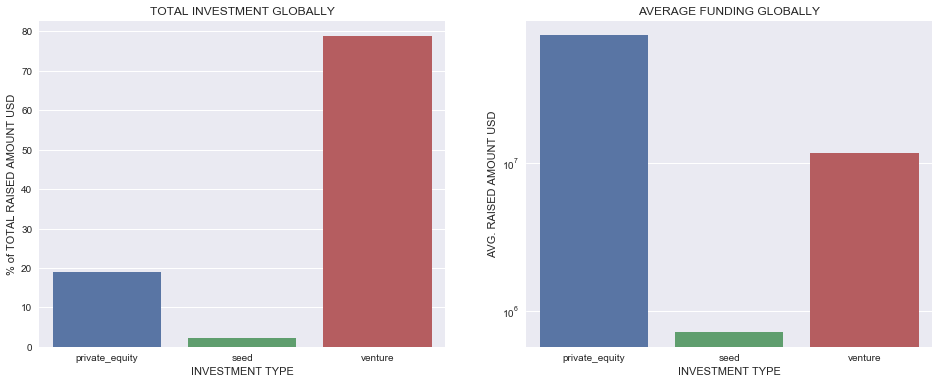

In [215]:
sb.set(style="darkgrid")
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
ax = sb.barplot(x=fraction_df.index,y='raised_amount_usd',data=fraction_df,ci=None)
ax.set(xlabel='INVESTMENT TYPE', ylabel='% of TOTAL RAISED AMOUNT USD',title='TOTAL INVESTMENT GLOBALLY')
#plt.yscale('log')
plt.subplot(1, 2, 2)
ax = sb.barplot(x=df_plot2.index,y='raised_amount_usd',data=df_plot2,ci=None,)
ax.set(xlabel='INVESTMENT TYPE', ylabel='AVG. RAISED AMOUNT USD',title='AVERAGE FUNDING GLOBALLY')
plt.yscale('log')
plt.show()

### A plot showing the top 9 countries against the total amount of investments of funding type FT.

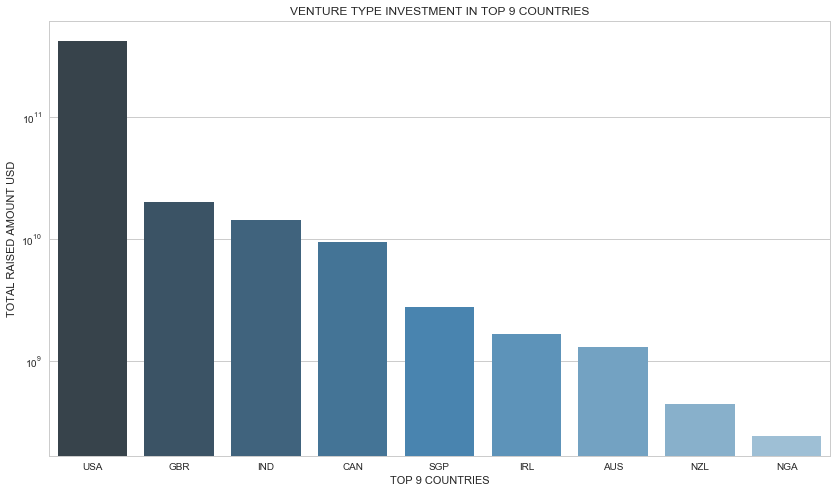

In [216]:
sb.set(style="whitegrid")
#sb.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(14,8))
#plt.ticklabel_format(style='plain', axis='y')
top9['raised_amount_usd'] = top9['raised_amount_usd'].astype(np.float64)
ax = sb.barplot(x=top9.index, y="raised_amount_usd",data=top9,ci=None,palette="Blues_d")
ax.set(xlabel='TOP 9 COUNTRIES', ylabel='TOTAL RAISED AMOUNT USD',title='VENTURE TYPE INVESTMENT IN TOP 9 COUNTRIES')
plt.yscale('log')
plt.show()

### A plot showing the number of investments in the top 3 sectors of the top 3 countries

In [217]:
d1_top_sector = d1_count.sort_values(by='count_of_investment',ascending=False).head(3)
d2_top_sector = d2_count.sort_values(by='count_of_investment',ascending=False).head(3)
d3_top_sector = d3_count.sort_values(by='count_of_investment',ascending=False).head(3)

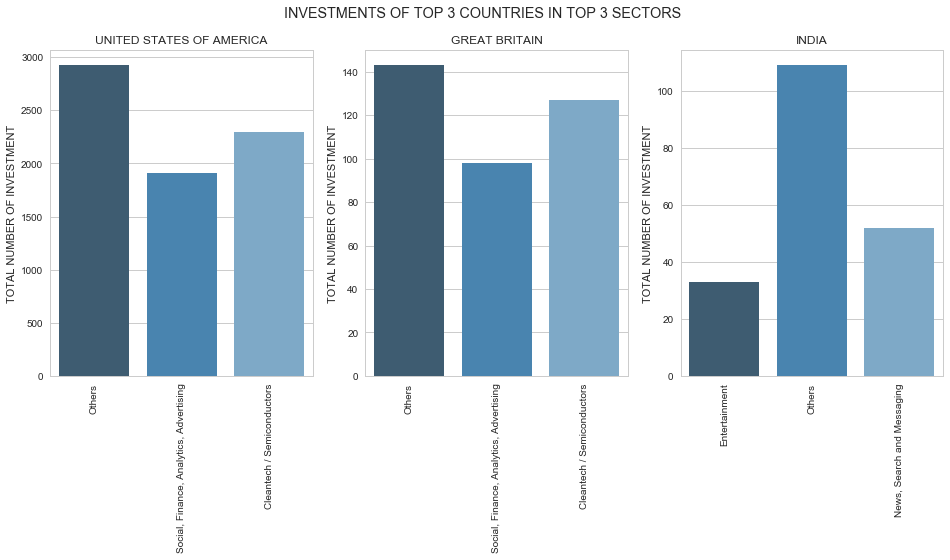

In [218]:
sb.set(style="whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
ax=sb.countplot(x="main_sector",palette="Blues_d",data=d1[d1['main_sector'].isin(d1_top_sector['main_sector'])])
ax.set(xlabel='', ylabel='TOTAL NUMBER OF INVESTMENT',title='UNITED STATES OF AMERICA')
plt.xticks(rotation=90)
plt.subplot(1, 3, 2)
ax=sb.countplot(x="main_sector",palette="Blues_d",data=d2[d2['main_sector'].isin(d2_top_sector['main_sector'])])
ax.set(xlabel='', ylabel='TOTAL NUMBER OF INVESTMENT',title='GREAT BRITAIN')
plt.xticks(rotation=90)
plt.subplot(1, 3, 3)
ax = sb.countplot(x="main_sector",palette="Blues_d",data=d3[d3['main_sector'].isin(d3_top_sector['main_sector'])])
ax.set(xlabel='', ylabel='TOTAL NUMBER OF INVESTMENT',title='INDIA')
plt.suptitle("INVESTMENTS OF TOP 3 COUNTRIES IN TOP 3 SECTORS")
plt.xticks(rotation=90)
plt.show()